# Importing library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
df=pd.read_csv('orders.csv')
df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1.0,2.0,8.0,NaN
1,2398795,1,prior,2.0,3.0,7.0,15.0
2,473747,1,prior,3.0,3.0,12.0,21.0
3,2254736,1,prior,4.0,4.0,7.0,29.0
4,431534,1,prior,5.0,4.0,15.0,28.0
...,...,...,...,...,...,...,...
339867,227626,20582,prior,6.0,4.0,17.0,4.0
339868,1199731,20582,prior,7.0,5.0,17.0,22.0
339869,3287039,20582,prior,8.0,5.0,19.0,21.0
339870,76276,20582,prior,9.0,2.0,11.0,30.0


# Intial few rows

In [7]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1.0,2.0,8.0,NaN
1,2398795,1,prior,2.0,3.0,7.0,15.0
2,473747,1,prior,3.0,3.0,12.0,21.0
3,2254736,1,prior,4.0,4.0,7.0,29.0
4,431534,1,prior,5.0,4.0,15.0,28.0


# Ending few rows

In [8]:
df.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
339867,227626,20582,prior,6.0,4.0,17.0,4.0
339868,1199731,20582,prior,7.0,5.0,17.0,22.0
339869,3287039,20582,prior,8.0,5.0,19.0,21.0
339870,76276,20582,prior,9.0,2.0,11.0,30.0
339871,1091420,20582,te,NaN,NaN,NaN,NaN


# check no of row,column

In [3]:
df.shape

(339872, 7)

# Getting column info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339872 entries, 0 to 339871
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                339872 non-null  int64  
 1   user_id                 339872 non-null  int64  
 2   eval_set                339872 non-null  object 
 3   order_number            339871 non-null  float64
 4   order_dow               339871 non-null  float64
 5   order_hour_of_day       339871 non-null  float64
 6   days_since_prior_order  319289 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 18.2+ MB


# Getting numeric column math data

In [6]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.398720e+05,339872.000000,339871.000000,339871.000000,339871.000000,319289.000000
mean,1.712051e+06,10288.901242,17.181640,2.789558,13.461343,11.116446
std,9.883735e+05,5923.217791,17.892295,2.047646,4.207276,9.205256
min,8.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000
25%,8.571482e+05,5198.000000,5.000000,1.000000,10.000000,4.000000
50%,1.712034e+06,10252.000000,11.000000,3.000000,13.000000,7.000000
75%,2.568734e+06,15452.000000,23.000000,5.000000,16.000000,15.000000
max,3.421068e+06,20582.000000,100.000000,6.000000,23.000000,30.000000


# Checking missing values

In [10]:
df.isnull().sum()

,0
order_id,0
user_id,0
eval_set,0
order_number,1
order_dow,1
order_hour_of_day,1
days_since_prior_order,20583


# Unique values

In [11]:
df.nunique()

,0
order_id,339872
user_id,20582
eval_set,4
order_number,100
order_dow,7
order_hour_of_day,24
days_since_prior_order,31


# value count for eval_set column

In [12]:
df["eval_set"].value_counts()

,count
eval_set,
prior,319290
train,13163
test,7418
te,1


# Orders per user

In [35]:
orders_per_user = df.groupby("user_id")["order_number"].count()
orders_per_user

,order_number
user_id,
1,11
2,15
3,13
4,6
5,5
...,...
20578,5
20579,7
20580,18


# Orders by Day of Week

In [25]:
df["order_dow"].value_counts().sort_index()


,count
order_dow,
0.0,59380
1.0,57510
2.0,46588
3.0,43582
4.0,42385
5.0,45438
6.0,44988


# Orders by Hour of Day

In [29]:
df["order_hour_of_day"].value_counts().sort_index()


,count
order_hour_of_day,
0.0,2085
1.0,1190
2.0,699
3.0,527
4.0,584
5.0,963
6.0,3027
7.0,9211
8.0,17759


# Average Gap Between Orders by Day

In [31]:
df.groupby("order_dow")["days_since_prior_order"].mean()



,days_since_prior_order
order_dow,
0.0,11.791548
1.0,11.381790
2.0,11.111466
3.0,10.754624
4.0,10.551865
5.0,10.497412
6.0,11.410111


# Orders by Day of Week

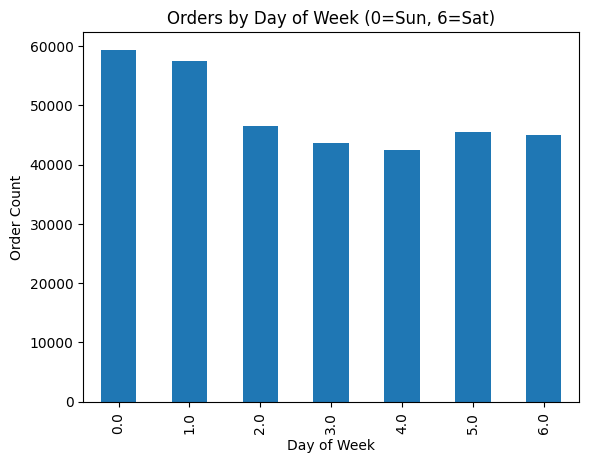

In [32]:
plt.figure()
df["order_dow"].value_counts().sort_index().plot(kind="bar")
plt.title("Orders by Day of Week (0=Sun, 6=Sat)")
plt.xlabel("Day of Week")
plt.ylabel("Order Count")
plt.show()


# Orders by Hour of Day

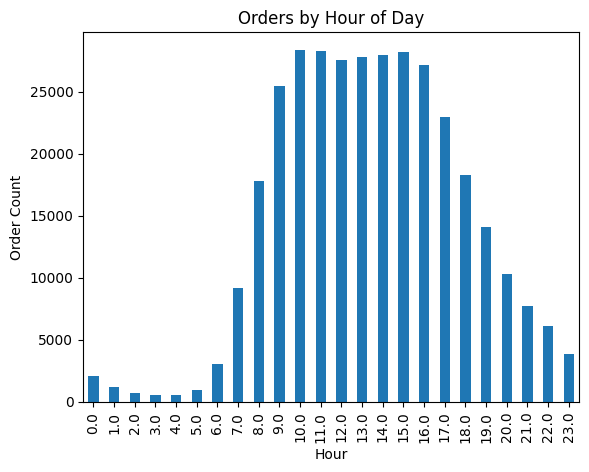

In [33]:
plt.figure()
df["order_hour_of_day"].value_counts().sort_index().plot(kind="bar")
plt.title("Orders by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Order Count")
plt.show()


# Orders per User Distribution

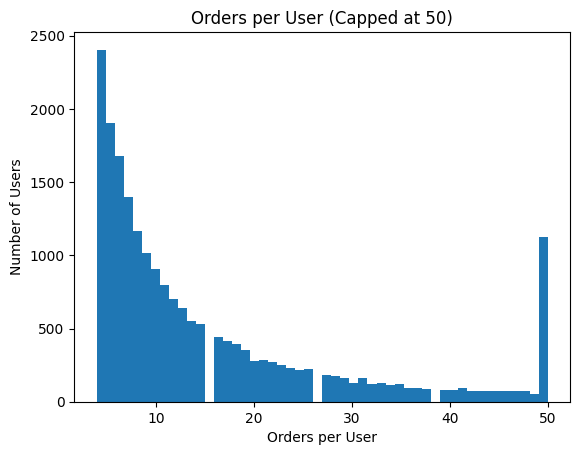

In [36]:
plt.figure()
orders_per_user.clip(upper=50).plot(kind="hist", bins=50)
plt.title("Orders per User (Capped at 50)")
plt.xlabel("Orders per User")
plt.ylabel("Number of Users")
plt.show()


# Days Since Prior Order Distribution

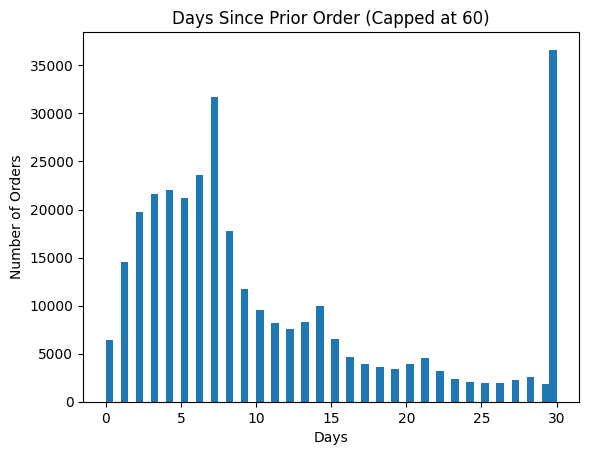

In [37]:
plt.figure()
df["days_since_prior_order"].dropna().clip(upper=60).plot(kind="hist", bins=60)
plt.title("Days Since Prior Order (Capped at 60)")
plt.xlabel("Days")
plt.ylabel("Number of Orders")
plt.show()
